In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# State = [Return, RSI, MA ratio, Volatility, Volume change]

yang dibutuhkan ketika memprediksi untuk membeli atau tidak

kita sudah memiliki volume, utnuk data yang lain kita perlu mengubah nilai dari high, low & close menjadi Return, RSI, MA ratio, Volatility agar saat memprediksi nanti bisa lebih seimbang

In [2]:
data = pd.read_csv('Coin_Aave.csv')

# Log return
agar lebih stabil saat memprediksi nanti

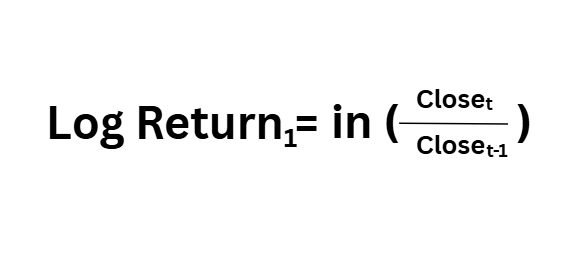

In [3]:
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

# Moving Average

pembatasan aman

State shape = (10 hari, 4 fitur)

In [4]:
# Simple MA 
data['ma5'] = data['Close'].rolling(window=5).mean()
data['ma20'] = data['Close'].rolling(window=20).mean()

In [5]:
# MA ratio agar lebih informatif dari mentahan simple moving average
data['ma_ratio'] = data['ma5'] / data['ma20']

# VOLATILITY

In [6]:
# # untuk harian
# data['volatility'] = data['High'] - data['Low']

In [7]:
# untuk waktu tertentu (misal 3/5 hari)
data['volatility'] = data['log_return'].rolling(5).std()

# RSI (Relative Strength Index)

 indikator teknikal momentum yang mengukur kecepatan dan perubahan pergerakan harga aset untuk menentukan kondisi overbought (jenuh beli) atau oversold (jenuh jual).

## RSI periode 14 hari (standar)

### Perhitungan dari:

Hitung perubahan harga

Pisahkan gain & loss

Hitung average gain & average loss

Hitung RS

Hitung RSI

In [8]:
delta = data['Close'].diff()

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss
data['rsi'] = 100 - (100 / (1 + rs))

In [9]:
data.dropna(inplace=True)

### agar lebih stabil, kita menggunakan sklearn/standarscaler

In [10]:
scaler = StandardScaler()
features = ['log_return', 'ma_ratio', 'volatility', 'rsi'] # Ini membuat list berisi 1 tuple
data[features] = scaler.fit_transform(data[features])

In [11]:
from IPython.display import FileLink

data.to_csv('data_hasil_olah_Aave.csv', index=False) 
FileLink('coin_Aave_down.csv')

G:\jupyter\project\study telkom,\crypto\coin_Aave\coin_Aave_down.csv

In [12]:
import os
print(os.getcwd())

G:\jupyter\project\study telkom,\crypto\coin_Aave


In [13]:
print(os.listdir())

['.ipynb_checkpoints', 'coin_Aave.csv', 'coin_Aave_cleaning.ipynb', 'coin_Aave_EDA.ipynb', 'coin_Aave_Feature-Engineering.ipynb', 'coin_Aave_line.twb', 'coin_Aave_Split_Training.ipynb', 'data_hasil_olah.csv', 'data_hasil_olah_Aave.csv']
